In [1]:
!pip install -U augly
!apt-get install python3-magic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
#!pip install Keras==2.2.4
#from importlib import reload  
import autoreload
%load_ext autoreload
%autoreload 2
#import loader
#reload(loader)
#from loader.fb_image_gen import *

In [3]:
''' Simple triplet based similarity training;
Simple: using a simple model with dense layers and few conv2d only
ref:https://github.com/Ekeany/Siamese-Network-with-Triplet-Loss/blob/master/MachinePart1.ipynb
#requires keras 2.2.5(cityscape env)
'''
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#from args import get_arguments
import argparse
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from pathlib import Path

import time
from datetime import datetime

In [4]:
import tensorflow
print(tensorflow.__version__)#has to be 2.6 version

2.6.0


In [5]:
!apt-get install libomp-dev
#!pip install --upgrade faiss==1.7.1
!pip install faiss-cpu==1.7.1
import faiss
print( faiss.__version__)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 1s (229 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155079 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Selecting previously unselected package libomp-dev.
Preparing to unpack .../libomp-dev_5.0.1-1_amd64.deb ...
Unpacking libomp-dev (5.0.1-

In [6]:
!pip install albumentations==1.0.3
import albumentations as A
print(A.__version__)

     |████████████████████████████████| 98 kB 5.4 MB/s 
     |████████████████████████████████| 37.1 MB 93 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
1.0.3


In [7]:
import augly

In [8]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!cp -a /content/drive/MyDrive/collab_drive/isc2021-dev/. /content/

In [10]:
import os
if os.path.exists('/content/data/query.zip'):
  print("query.zip already exists; skip download and unzip")
else:
  print("starting to copy and unzip")
  !mkdir ./data
  !mkdir ./data/image
  !mkdir ./data/embed
  !cp /content/drive/MyDrive/collab_drive/isc-data/reference.zip /content/data/reference.zip
  !cp /content/drive/MyDrive/collab_drive/isc-data/query.zip /content/data/query.zip
  !unzip -qq data/reference.zip -d data/image
  !unzip -qq data/query.zip -d data/image

starting to copy and unzip


In [11]:

import autoreload
%load_ext autoreload
%autoreload 2
from utils import *

from settings import * # importing all the variables and Cosntants
from getmodel import *

from importlib import reload  
from triplet_hardlibtf import *
print(get_model_name())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  found 4991 images
  found 4991 images
model name: resnet50tf1
resnet50tf1


ipimg:  (160, 160, 3) uint8 255 33
outimg:  (160, 160, 3) uint8 255 0


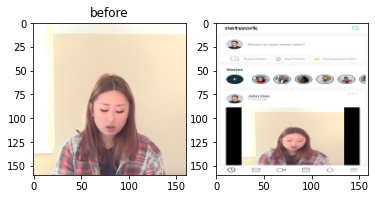

In [12]:
%matplotlib inline
from augument import *
import matplotlib.pyplot as plt
from augument import apply_aug_internal
#from loader.fb_image_gen_pre_tf import read_image
ipimg = read_image(R_List[0])
plt.subplot(1,2,1)
plt.imshow(ipimg)
plt.title("before")
#A.Resize()
#outimg = apply_aug_internal(ipimg, 4)
outimg = get_augument_image_internal(ipimg)
#3 choice needs work, #6,4 needs shape
print("ipimg: ", ipimg.shape, ipimg.dtype, np.max(ipimg), np.min(ipimg))
print("outimg: ",outimg.shape, outimg.dtype, np.max(outimg), np.min(outimg))
plt.subplot(1,2,2)
plt.imshow(outimg)

In [13]:
def save_models_weights(suffix=''):
  modelname = 'models/weights/'+ get_model_name()+"_complete_"+suffix+".hdf5"
  basemodelname = 'models/weights/'+ get_model_name()+"_base_"+suffix+".hdf5"
  model.save_weights(modelname)
  base_model.save_weights(basemodelname)
  print("basemodelname = ", basemodelname)
  #!cp ./models/weights/*.hdf5 /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf
  !cp $basemodelname /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf
  !cp $modelname /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf
  print("saved model weights and copied to google drive")
#save_models_weights()

def save_code():
  #!cp -a ./models/weights/ /content/drive/MyDrive/collab_drive/model_artifacts
  #!cp -a ./models/logs/ /content/drive/MyDrive/collab_drive/model_artifacts

  !cp /content/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/
  !cp /content/models/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/models/
  !cp /content/loader/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/loader/
  !cp /content/isc/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/isc/
#save_code()
#!cp /content/*.p /content/drive/MyDrive/collab_drive/model_artifacts/

In [14]:

#!mkdir ./data/image
gen_results = False
!cp /content/drive/MyDrive/collab_drive/isc-data/im_subset_ref.zip /content/data/
!cp /content/drive/MyDrive/collab_drive/isc-data/im_subset_query.zip /content/data/
!cp /content/drive/MyDrive/collab_drive/isc-data/image_dev_queries.zip /content/data/
if gen_results==False:
  !cp /content/drive/MyDrive/collab_drive/isc-data/image_extended_Ref.zip /content/data/
  !unzip -qq ./data/image_extended_Ref.zip -d data/image/
  #!cp /content/drive/MyDrive/collab_drive/isc-data/mergedRefExtended0_2_chunk100_cont.hdf5 /content/data/image
  !cp /content/drive/MyDrive/collab_drive/isc-data/image_train_0_chunk100.zip /content/data/
  !unzip -qq ./data/image_train_0_chunk100.zip -d data/image/
else:
  !cp /content/drive/MyDrive/collab_drive/isc-data/image_full_ref*.hdf5 /content/data/image
#canot use zipped hdf5 as they are corrupt while uploading to gdrive
#!unzip ./data/im_hdf5.zip -d data/image/
#im_hdf5.zip will have following files(im_subset_query.hdf5,im_subset_query.hdf5, im_Dev_queries, im_ref_extended)

In [15]:
!unzip -qq ./data/im_subset_ref.zip -d data/image/
!unzip -qq ./data/im_subset_query.zip   -d data/image/

#!cp /content/drive/MyDrive/collab_drive/isc-data/image_dev_queries.zip /content/data/
!unzip -qq ./data/image_dev_queries.zip -d data/image/

In [16]:
!rm -f ./data/*.zip 

Inside: generate_triplets_hdfseq: total seq data= 500


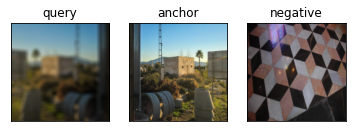

In [ ]:
test_generator = generate_triplets_train_hdfseq(start=0, stop=50000, batch_sz=100, forcePrep = False)
data = next(test_generator)
plot_triplets_batch(data, numTriplets=1)

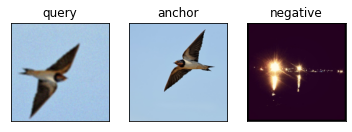

In [ ]:
plot_triplets_batch(data,start=91)
save_code()


**Import files and libraries**

In [17]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
#tf.keras.applications.resnet50


In [ ]:
#from keras.optimizers  import Adam
#keras.optimizers.Adam
base_model = embedding_model()
testgen = generate_triplets(BATCH_SIZE=16)
data = next(testgen )
[A, P, N], label = data
xq = np.squeeze(base_model.predict(A))
xb = np.squeeze(base_model.predict(P))
print(xq.shape)
d=xq.shape[-1]#dimension of embeddings
index = faiss.IndexFlatL2(d)
index.add(xb)
D, I = index.search(xq, 2) # search top 2
print("matching index before training....")
print(I)
print(D)
getMatchingScore(I, 1)

In [ ]:
from getmodel import *
!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/resnet50tf_base_GOLD5_drop0.5.hdf5 ./models/weights/
#!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/resnet50tf_base_GOLD5_1.hdf5 ./models/weights/

base_model = embedding_model(drop=0.5)
#model = complete_model(base_model)
#base_model.load_weights('models/weights/'+get_model_name()+"_base.hdf5")
#base_model.load_weights('models/weights/resnet50tf_base_89P_GOLD1.hdf5')
base_model.load_weights('models/weights/resnet50tf_base_GOLD5_drop0.5.hdf5')
model = complete_model(base_model)
#model.save_weights('models/weights/resnet50tf_complete_final_89P_GOLD1.hdf5')
#I1 = findAccuracy(base_model)

conv5_block found
total no of layers:  175


In [ ]:
from getmodel import *
#!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/resnet50tf_base_GOLD5_drop0.4.hdf5 ./models/weights/

base_model1 = embedding_model_old(drop=0.4)
base_model1.load_weights('models/weights/resnet50tf_base_GOLD5_drop0.4.hdf5')


conv5_block found
total no of layers:  175


In [18]:
from getmodel import *
#base_model1.layers[-6].name
#remove the last 5 layers and take the output of layers[-6] as input
#base_model1.layers[-6].output.shape
#base_model = embedding_model(base_model1.layers[-6].output, drop =0.4)
base_model = embedding_model_new(drop=0.3,finetune=False)
!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/resnet50tf1_base_GOLD10_offline.hdf5 ./models/weights/
base_model.load_weights('models/weights/resnet50tf1_base_GOLD10_offline.hdf5')
model = complete_model(base_model)
I1= findAccuracy(base_model)

94781440/94765736 [==============================] - 0s 0us/step
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.07it/s]


Time for generation 1.2474267164866129 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:15<00:00,  2.05it/s]


Time for generation 1.2577646970748901 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 94.83870967741936% : 
I[0:5 [[3095]
 [   1]
 [   2]
 [4515]
 [   4]]
D[0:5 [[0.0098238 ]
 [0.05173242]
 [0.11571801]
 [0.05131221]
 [0.15232885]]


  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:33<00:00,  7.14it/s]


Time for generation 2.561854608853658 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf1.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:08<00:00,  7.33it/s]


Time for generation 1.1366776506106058 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf1.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  3297
ntp at 9=5, 49=15,99=25, 499=153, 999=349,
 4999=1341,7999=1895, 9999=2180,11999=2429
probas_pred at 9=-0.002227187156677246, 49=-0.005604863166809082,99=-0.008560657501220703, 499=-0.03009927272796631, 999=-0.048392653465270996,
 4999=-0.09505295753479004,7999=-0.11686575412750244, 9999=-0.13051509857177734,11999=-0.14429867267608643
precision at p[99]=0.25, p[499]=0.306,p[999]=0.349, p[4999]=0.2682,p[9999]=0.218
recall at r[99]=0.005009016229212583, r[499]=0.030655179322781004,r[999]=0.06992586655980765, r[4999]=0.2686836305349629,r[9999]=0.43678621518733723
Average Precision: 0.16593
Recall at P90    : 0.00080
Threshold at P90 : -0.00183237
Recall at rank 1:  0.66059
Recall at rank 10: 0.66059
*******Total no 

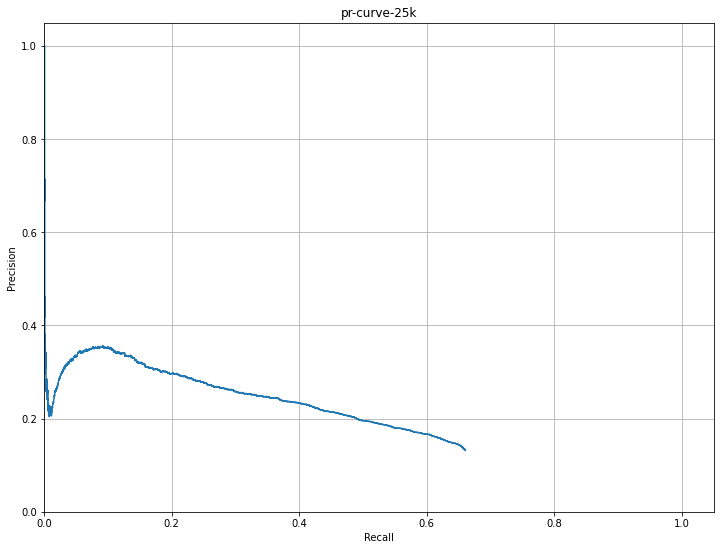

In [ ]:
generate_full_QueryEmbeddings(base_model)

  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:24<00:00,  7.61it/s]


Time for generation 2.401168386141459 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:02<00:00,  7.99it/s]


Time for generation 1.0432868282000223 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  4826
ntp at 9=10, 49=49,99=99, 499=499, 999=997,
 4999=4282,7999=4579, 9999=4660,11999=4712
probas_pred at 9=-0.0034029483795166016, 49=-0.011871933937072754,99=-0.017218708992004395, 499=-0.034012794494628906, 999=-0.04478287696838379,
 4999=-0.19863390922546387,7999=-0.291046142578125, 9999=-0.33026957511901855,11999=-0.3630419969558716
precision at p[99]=0.99, p[499]=0.998,p[999]=0.997, p[4999]=0.8564,p[9999]=0.466
recall at r[99]=0.019835704267681827, r[499]=0.09997996393508315,r[999]=0.1997595672209978, r[4999]=0.8579442997395311,r[9999]=0.9336806251252254
Average Precision: 0.90769
Recall at P90    : 0.83510
Threshold at P90 : -0.177394
Recall at rank 1:  0.96694
Recall at rank 10: 0.96694
*******Total no of corr

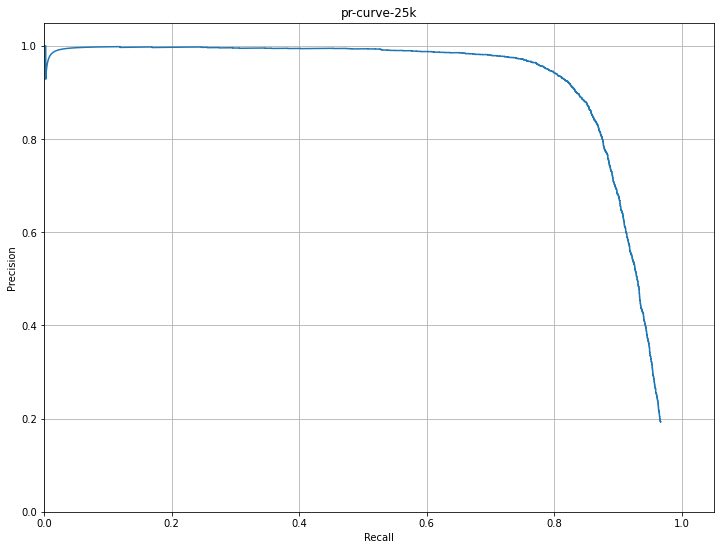

In [ ]:
generate_full_QueryEmbeddings(base_model)#GOLD_5_1 resnet50tf#new baseline# avgPre=0.9

  found 1000000 images
Total IDS: 1000000
iters 20
reading files from 0 to 50000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.76831663052241 mins
Writing embedding to file./data/embed/full_ref_em_0resnet50tf.hdf5
reading files from 50000 to 100000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.73it/s]


Time for generation 1.7624707500139871 mins
Writing embedding to file./data/embed/full_ref_em_1resnet50tf.hdf5
reading files from 100000 to 150000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.764270023504893 mins
Writing embedding to file./data/embed/full_ref_em_2resnet50tf.hdf5
reading files from 150000 to 200000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.771298587322235 mins
Writing embedding to file./data/embed/full_ref_em_3resnet50tf.hdf5
reading files from 200000 to 250000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.770208517710368 mins
Writing embedding to file./data/embed/full_ref_em_4resnet50tf.hdf5
reading files from 250000 to 300000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.73it/s]


Time for generation 1.7614532470703126 mins
Writing embedding to file./data/embed/full_ref_em_5resnet50tf.hdf5
reading files from 300000 to 350000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7664375225702922 mins
Writing embedding to file./data/embed/full_ref_em_6resnet50tf.hdf5
reading files from 350000 to 400000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7647342046101888 mins
Writing embedding to file./data/embed/full_ref_em_7resnet50tf.hdf5
reading files from 400000 to 450000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.69it/s]


Time for generation 1.7752932151158651 mins
Writing embedding to file./data/embed/full_ref_em_8resnet50tf.hdf5
reading files from 450000 to 500000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.69it/s]


Time for generation 1.7752566933631897 mins
Writing embedding to file./data/embed/full_ref_em_9resnet50tf.hdf5
reading files from 500000 to 550000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.7675949017206827 mins
Writing embedding to file./data/embed/full_ref_em_10resnet50tf.hdf5
reading files from 550000 to 600000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.73it/s]


Time for generation 1.7618901451428732 mins
Writing embedding to file./data/embed/full_ref_em_11resnet50tf.hdf5
reading files from 600000 to 650000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.7722057859102884 mins
Writing embedding to file./data/embed/full_ref_em_12resnet50tf.hdf5
reading files from 650000 to 700000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.763881802558899 mins
Writing embedding to file./data/embed/full_ref_em_13resnet50tf.hdf5
reading files from 700000 to 750000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.7699326992034912 mins
Writing embedding to file./data/embed/full_ref_em_14resnet50tf.hdf5
reading files from 750000 to 800000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.76it/s]


Time for generation 1.7522401332855224 mins
Writing embedding to file./data/embed/full_ref_em_15resnet50tf.hdf5
reading files from 800000 to 850000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7642457604408264 mins
Writing embedding to file./data/embed/full_ref_em_16resnet50tf.hdf5
reading files from 850000 to 900000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.76it/s]


Time for generation 1.7521663308143616 mins
Writing embedding to file./data/embed/full_ref_em_17resnet50tf.hdf5
reading files from 900000 to 950000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.7675678412119546 mins
Writing embedding to file./data/embed/full_ref_em_18resnet50tf.hdf5
reading files from 950000 to 1000000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:44<00:00,  4.77it/s]


Time for generation 1.7473768631617228 mins
Writing embedding to file./data/embed/full_ref_em_19resnet50tf.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [02:12<00:00,  7.56it/s]


Time for generation 2.2058377981185915 mins
Writing embedding to file./data/embed/full_query_em_resnet50tf.hdf5
*******Total no of correct predictions:  4621
ntp at 9=10, 49=49,99=99, 499=498, 999=991,
 4999=3983,7999=4323, 9999=4398,11999=4457
probas_pred at 9=-0.0034029483795166016, 49=-0.011871933937072754,99=-0.017218708992004395, 499=-0.03398704528808594, 999=-0.04469764232635498,
 4999=-0.15234017372131348,7999=-0.2162569761276245, 9999=-0.24363958835601807,11999=-0.2692880630493164
precision at p[99]=0.99, p[499]=0.996,p[999]=0.991, p[4999]=0.7966,p[9999]=0.4398
recall at r[99]=0.019835704267681827, r[499]=0.09977960328591465,r[999]=0.1985574033259868, r[4999]=0.7980364656381487,r[9999]=0.8811861350430775
Average Precision: 0.83858
Recall at P90    : 0.73833
Threshold at P90 : -0.123045
Recall at rank 1:  0.92587
Recall at rank 10: 0.92587
*******Total no of correct predictions:  4621
*******Total no of incorrect predictions:  20379
*************Suggested accuracy from metrics e

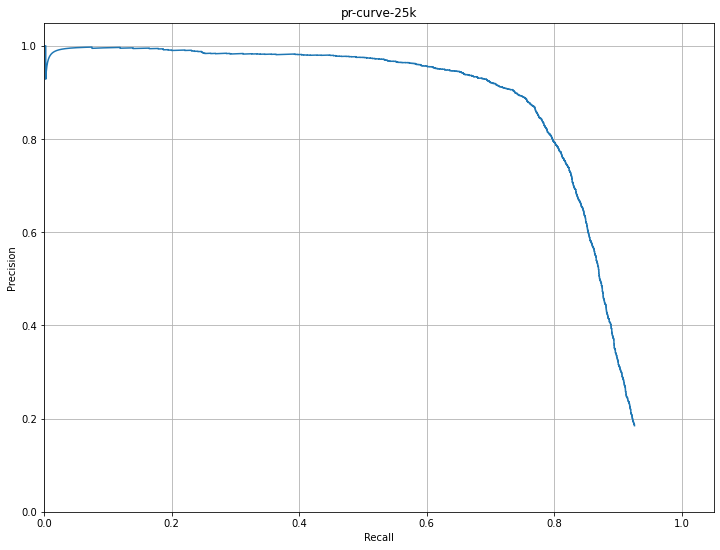

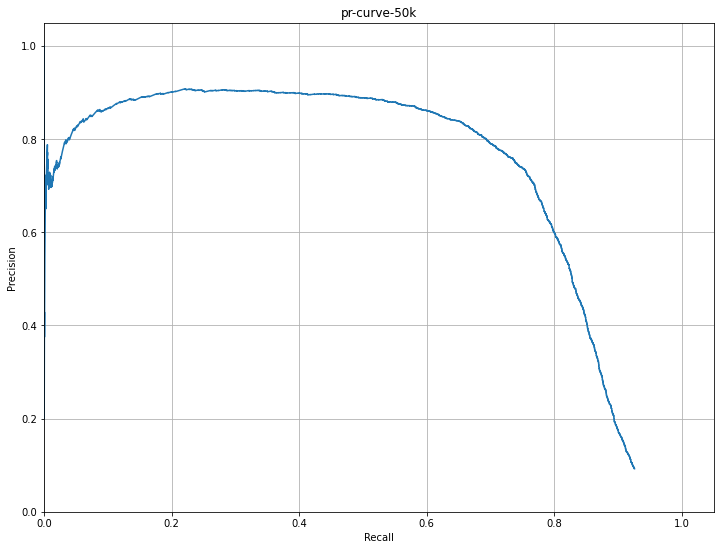

In [ ]:
from triplet_hardlibtf import *
generate_full_RefEmbeddings(base_model)#, gen_embed=True)#baseline(0.83 precision)

  found 1000000 images
Total IDS: 1000000
iters 20
reading files from 0 to 50000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.69it/s]


Time for generation 1.7780748724937439 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_0resnet50tf1.hdf5
reading files from 50000 to 100000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.7739367167154947 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_1resnet50tf1.hdf5
reading files from 100000 to 150000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:47<00:00,  4.66it/s]


Time for generation 1.7867623368899028 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_2resnet50tf1.hdf5
reading files from 150000 to 200000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.7746238072713216 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_3resnet50tf1.hdf5
reading files from 200000 to 250000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.7730323115984599 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_4resnet50tf1.hdf5
reading files from 250000 to 300000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:47<00:00,  4.67it/s]


Time for generation 1.7845159649848938 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_5resnet50tf1.hdf5
reading files from 300000 to 350000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.74it/s]


Time for generation 1.7582787195841472 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_6resnet50tf1.hdf5
reading files from 350000 to 400000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.69it/s]


Time for generation 1.77750004529953 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_7resnet50tf1.hdf5
reading files from 400000 to 450000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:47<00:00,  4.67it/s]


Time for generation 1.7859558701515197 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_8resnet50tf1.hdf5
reading files from 450000 to 500000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:48<00:00,  4.63it/s]


Time for generation 1.8017282406489055 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_9resnet50tf1.hdf5
reading files from 500000 to 550000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.772304097811381 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_10resnet50tf1.hdf5
reading files from 550000 to 600000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.73it/s]


Time for generation 1.763688584168752 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_11resnet50tf1.hdf5
reading files from 600000 to 650000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.7709852615992228 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_12resnet50tf1.hdf5
reading files from 650000 to 700000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.7719987432161968 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_13resnet50tf1.hdf5
reading files from 700000 to 750000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7657837549845377 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_14resnet50tf1.hdf5
reading files from 750000 to 800000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.72it/s]


Time for generation 1.7671720504760742 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_15resnet50tf1.hdf5
reading files from 800000 to 850000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.769996968905131 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_16resnet50tf1.hdf5
reading files from 850000 to 900000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.74it/s]


Time for generation 1.7596423864364623 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_17resnet50tf1.hdf5
reading files from 900000 to 950000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7653491139411925 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_18resnet50tf1.hdf5
reading files from 950000 to 1000000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.67it/s]


Time for generation 1.7833953460057577 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_ref_em_19resnet50tf1.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [02:14<00:00,  7.45it/s]


Time for generation 2.2378546794255576 mins
*****embedding array shape: (50000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf1.hdf5
XQ embedding array shape: (50000, 256)
XD embedding array shape: (1000000, 256)
*******Total no of correct predictions:  4596
ntp at 9=10, 49=49,99=99, 499=497, 999=981,
 4999=3855,7999=4238, 9999=4332,11999=4406
probas_pred at 9=-0.00311887264251709, 49=-0.011565327644348145,99=-0.017617106437683105, 499=-0.0365142822265625, 999=-0.04828786849975586,
 4999=-0.1534355878829956,7999=-0.211370587348938, 9999=-0.23801648616790771,11999=-0.2622421979904175
precision at p[99]=0.99, p[499]=0.994,p[999]=0.981, p[4999]=0.771,p[9999]=0.4332
recall at r[99]=0.019835704267681827, r[499]=0.09957924263674614,r[999]=0.19655379683430174, r[4999]=0.7723903025445803,r[9999]=0.8679623321979564
Average Precision: 0.81287
Recall at P90    : 0.66920
Threshold at P90 : -0.115587
Recall at rank 1:  0.92086
Recall at rank 10: 0.92086
*******Total no of corre

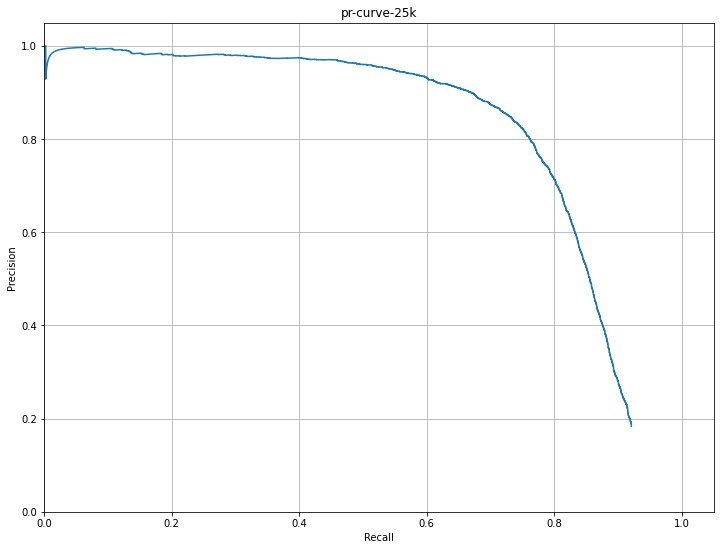

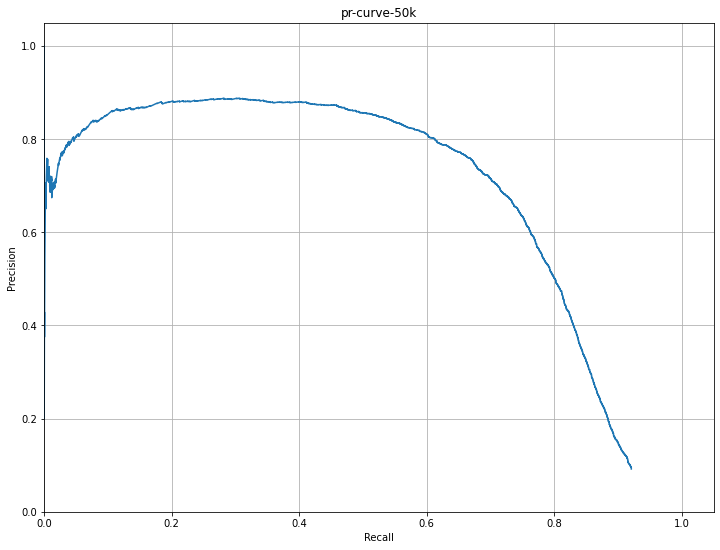

In [ ]:
generate_full_RefEmbeddings(base_model, gen_embed=True)#GOLD3
!cp /content/data/*.csv /content/drive/MyDrive/collab_drive/csvfiles/
!cp /content/data/25*.csv /content/drive/MyDrive/collab_drive/csvfiles/
!cp /content/data/fullQ*.csv /content/drive/MyDrive/collab_drive/csvfiles/
!cp /content/*.jpg /content/drive/MyDrive/collab_drive/csvfiles/
!cp /content/list_files/fullQ*.csv /content/drive/MyDrive/collab_drive/csvfiles/

In [ ]:

!cp /content/list_files/fullQ*.csv /content/drive/MyDrive/collab_drive/csvfiles/

In [ ]:
from getmodel import *
print("modelname:", get_model_name())
base_model = embedding_model()
model = complete_model(base_model)
modelFilePath = "./models/weights/"
base_model.summary()
model.summary()
model.compile(loss=identity_loss, optimizer=Adam(1e-4))

resnet50tf2
modelname: resnet50tf2
conv5_block found at count =  143
total no of layers:  175
Model: "Embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1_conv[0][0]              

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Embedding (Functional)          (None, 256)          36760960    input_2[0][0]                    
                                                                 input_3[0][0]                

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/20
69/69 [==============================] - 45s 325ms/step - loss: 0.0626 - val_loss: 0.0035
Epoch 2/20
69/69 [==============================] - 20s 291ms/step - loss: 0.0101 - val_loss: 0.0073
Epoch 3/20
69/69 [==============================] - 20s 287ms/step - loss: 0.0056 - val_loss: 0.0012
Epoch 4/20
69/69 [==============================] - 20s 291ms/step - loss: 0.0023 - val_loss: 0.0078
Epoch 5/20
69/69 [==============================] - 19s 284ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 6/20
69/69 [==============================] - 20s 285ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 7/20
69/69 [==============================] - 20s 287ms/step - loss: 0.0022 - val_loss: 0.0121
Epoch 8/20
69/69 [==============================] - 20s 288ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 9/20
69/69 [==============================] - 19s 280ms/step - loss: 8.2263e-04 - val_loss: 0.0034
Epoch 10/20
69/69 [==============================] - 19s 281ms/step - loss: 0.0011 - va

100%|██████████| 155/155 [00:58<00:00,  2.64it/s]


Time for generation 0.9800215482711792 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:15<00:00,  2.06it/s]


Time for generation 1.2541106899579366 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 24.576612903225804% : 
I[0:5 [[2041]
 [2924]
 [3865]
 [2283]
 [3934]]
D[0:5 [[0.2342329 ]
 [0.03872061]
 [0.05334198]
 [0.19591391]
 [0.07556272]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:22<00:00,  7.71it/s]


Time for generation 2.3715061068534853 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf1.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:04<00:00,  7.81it/s]


Time for generation 1.066848083337148 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf1.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  957
ntp at 9=10, 49=50,99=99, 499=335, 999=404,
 4999=600,7999=700, 9999=743,11999=781
probas_pred at 9=-0.0014717578887939453, 49=-0.005463719367980957,99=-0.009795665740966797, 499=-0.022804856300354004, 999=-0.02676105499267578,
 4999=-0.03987753391265869,7999=-0.04803156852722168, 9999=-0.054306626319885254,11999=-0.062326908111572266
precision at p[99]=0.99, p[499]=0.67,p[999]=0.404, p[4999]=0.12,p[9999]=0.0743
recall at r[99]=0.019835704267681827, r[499]=0.0671208174714486,r[999]=0.08094570226407534, r[4999]=0.12021638950110199,r[9999]=0.14886796233219796
Average Precision: 0.08459
Recall at P90    : 0.05049
Threshold at P90 : -0.019019
Recall at rank 1:  0.19175
Recall at rank 10: 0.19175
*******Total no of corr

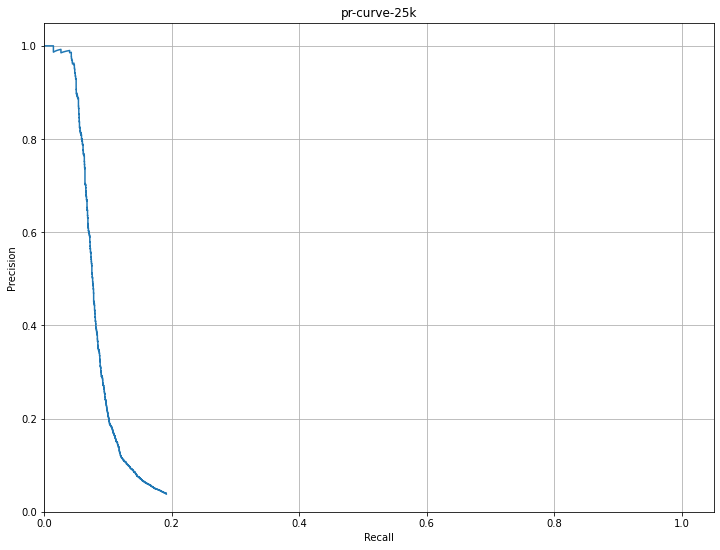

In [ ]:

#base_model = embedding_model()
#model = complete_model(base_model)
modelFilePath = "./models/weights/"
#base_model.load_weights('models/weights/resnet50tf_base_89P_GOLD1.hdf5')
#model.load_weights(modelFilePath + 'resnet50tf_complete_final_89P_GOLD1.hdf5')
model.summary()
model.compile(loss=identity_loss, optimizer=Adam(1e-4))
model, base_model = train_basic(model, base_model, epochs=20,batchsize = 64)
I_1 = findAccuracy(base_model)
pickle.dump(I_1, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)

In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(1e-4))
model, base_model = train_basic_traindev(model, base_model, epochs=5,batchsize = 100)
I1 = findAccuracy(base_model)
#pickle.dump(I_1, open("./data/L2Index_2_prev.p", "wb"))
#generate_full_QueryEmbeddings(base_model)
#save_models_weights("train")

current date time:  13-10-2021_H23_M47
Inside: generate_triplets_hdfseq: total seq data= 500
Starting train dev training process!
-------------------------------------


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
500/500 [==============================] - 610s 1s/step - loss: 0.3261 - val_loss: 0.0250
Epoch 2/5
500/500 [==============================] - 599s 1s/step - loss: 0.2097 - val_loss: 0.0459
Epoch 3/5
500/500 [==============================] - 601s 1s/step - loss: 0.1824 - val_loss: 0.0548
Epoch 4/5
500/500 [==============================] - 600s 1s/step - loss: 0.1669 - val_loss: 0.0632
Epoch 5/5
500/500 [==============================] - 598s 1s/step - loss: 0.1577 - val_loss: 0.0857
sum(square)difference between anchor and Positive: 1.3321537
sum(square)difference between anchor and negative: 1.9888707
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [00:58<00:00,  2.67it/s]


Time for generation 0.966761056582133 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:13<00:00,  2.12it/s]


Time for generation 1.2199446201324462 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 18.306451612903228% : 
I[0:5 [[4131]
 [2399]
 [ 567]
 [ 103]
 [2731]]
D[0:5 [[0.03391385]
 [0.18338132]
 [0.17838836]
 [0.00845993]
 [0.08636022]]


train_stop=  204
current date time:  17-10-2021_H19_M51
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [00:57<00:00,  2.71it/s]


Time for generation 0.9534990906715393 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.17it/s]


Time for generation 1.1917773842811585 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 91.69354838709678% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.01430368]
 [0.03744388]
 [0.12741971]
 [0.02504861]
 [0.13455904]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:24<00:00,  7.59it/s]


Time for generation 2.410208733876546 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf1.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:03<00:00,  7.83it/s]


Time for generation 1.0649663845698039 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf1.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  3446
ntp at 9=3, 49=6,99=12, 499=112, 999=320,
 4999=1458,7999=2014, 9999=2320,11999=2586
probas_pred at 9=-0.0013076066970825195, 49=-0.0032415390014648438,99=-0.004474282264709473, 499=-0.021343231201171875, 999=-0.038581013679504395,
 4999=-0.08479595184326172,7999=-0.10859537124633789, 9999=-0.12311005592346191,11999=-0.138336181640625
precision at p[99]=0.12, p[499]=0.224,p[999]=0.32, p[4999]=0.2916,p[9999]=0.232
recall at r[99]=0.0024043277900220395, r[499]=0.02244039270687237,r[999]=0.06411540773392106, r[4999]=0.2921258264876778,r[9999]=0.4648367060709277
Average Precision: 0.17761
Recall at P90    : 0.00040
Threshold at P90 : -0.000373483
Recall at rank 1:  0.69044
Recall at rank 10: 0.69044
*******Total no o

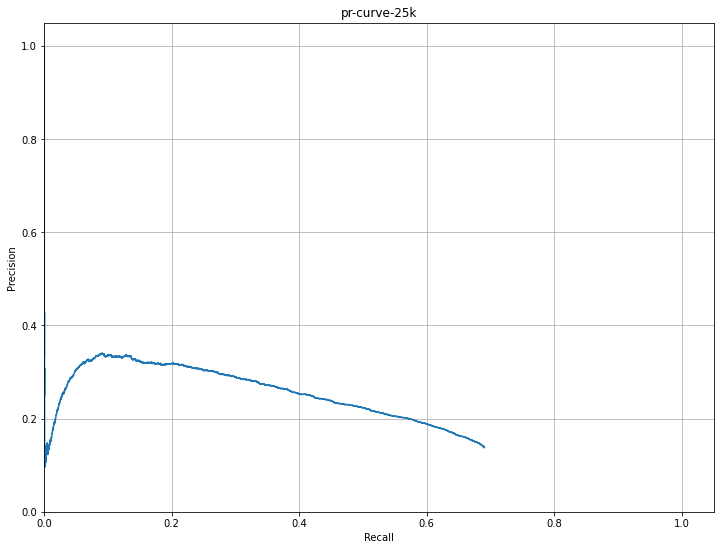

In [19]:
from triplet_hardlibtf import *
pickle.dump(I1, open("./data/L2Index_2_prev.p", "wb"))
save_code()
model.compile(loss=identity_loss, optimizer=Adam(1e-4))
test_hardOffline_online_Batch(model, base_model, epochs=20,batchsize = 32,pat=100)
I1 = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model)

resnet50tf1
--------------running ith 0 iteration---------------------
train_stop=  314
current date time:  17-10-2021_H22_M53
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
300/840 -------------
[300] Time for 300 iterations: 11.3 mins, Train Loss: 0.6243307590484619
val_loss =  0.8427969
best loss found, previous: 1000, current: 0.8427969217300415 
curr best_val_index=  300
600/840 -------------
[600] Time for 600 iterations: 22.7 mins, Train Loss: 0.6479707956314087
val_loss =  0.7628561
best loss found, previous: 0.8427969217300415, current: 0.762856125831604 
curr best_val_index=  600
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [00:59<00:00,  2.58it/s]


Time for generation 0.9998963832855224 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.07it/s]


Time for generation 1.2457373142242432 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 97.90322580645162% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.01777589]
 [0.04036427]
 [0.08398676]
 [0.03198755]
 [0.11161053]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11.hdf5
saved model weights and copied to google drive
--------------running ith 1 iteration---------------------
train_stop=  368
current date time:  17-10-2021_H23_M27
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
300/882 -------------
[300] Time for 300 iterations: 11.4 mins, Train Loss: 0.7119794487953186
val_loss =  0.741395
best loss found, previous: 1000, current: 0.7413949966430664 
curr best_val_index=  300
600/882 -------------
[600] Time for 600 iterati

100%|██████████| 155/155 [00:56<00:00,  2.72it/s]


Time for generation 0.9499730189641317 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:12<00:00,  2.13it/s]


Time for generation 1.2108553806940714 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.26612903225806% : 
I[0:5 [[2894]
 [   1]
 [   2]
 [   3]
 [   4]]
D[0:5 [[0.01907599]
 [0.03330302]
 [0.08473885]
 [0.02983248]
 [0.10990167]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11.hdf5
saved model weights and copied to google drive
--------------running ith 2 iteration---------------------
train_stop=  413
current date time:  18-10-2021_H00_M03
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
300/896 -------------
[300] Time for 300 iterations: 11.3 mins, Train Loss: 0.6300296783447266
val_loss =  0.73328507
best loss found, previous: 1000, current: 0.7332850694656372 
curr best_val_index=  300
600/896 -------------
[600] Tim

100%|██████████| 155/155 [00:57<00:00,  2.70it/s]


Time for generation 0.9555180112520854 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:12<00:00,  2.14it/s]


Time for generation 1.2081296483675639 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.4274193548387% : 
I[0:5 [[866]
 [  1]
 [  2]
 [  3]
 [  4]]
D[0:5 [[0.01898396]
 [0.04842532]
 [0.07559645]
 [0.02843344]
 [0.09652972]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11.hdf5
saved model weights and copied to google drive
--------------running ith 3 iteration---------------------
train_stop=  446
current date time:  18-10-2021_H00_M39
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
300/867 -------------
[300] Time for 300 iterations: 11.3 mins, Train Loss: 0.7532222270965576
val_loss =  0.64850914
best loss found, previous: 1000, current: 0.64850914478302 
curr best_val_index=  300
600/867 -------------
[600] Time for 60

100%|██████████| 155/155 [00:57<00:00,  2.72it/s]


Time for generation 0.9504532098770142 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.16it/s]


Time for generation 1.197990393638611 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.89112903225806% : 
I[0:5 [[866]
 [  1]
 [  2]
 [  3]
 [  4]]
D[0:5 [[0.01900458]
 [0.04087639]
 [0.07811928]
 [0.03188622]
 [0.09651792]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11.hdf5
saved model weights and copied to google drive
--------------running ith 4 iteration---------------------
train_stop=  467
current date time:  18-10-2021_H01_M14
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
300/810 -------------
[300] Time for 300 iterations: 11.2 mins, Train Loss: 0.6868230700492859
val_loss =  0.6313977
best loss found, previous: 1000, current: 0.6313977241516113 
curr best_val_index=  300
600/810 -------------
[600] Time for 6

100%|██████████| 155/155 [00:57<00:00,  2.68it/s]


Time for generation 0.9631480018297831 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.16it/s]


Time for generation 1.195091156164805 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.30645161290322% : 
I[0:5 [[866]
 [  1]
 [  2]
 [  3]
 [  4]]
D[0:5 [[0.0151453 ]
 [0.04632258]
 [0.08146787]
 [0.02590108]
 [0.09202194]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11.hdf5
saved model weights and copied to google drive
out of loop
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:21<00:00,  7.73it/s]


Time for generation 2.365854779879252 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf1.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:02<00:00,  7.97it/s]


Time for generation 1.04536612033844 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf1.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  4020
ntp at 9=1, 49=4,99=6, 499=89, 999=359,
 4999=1777,7999=2457, 9999=2828,11999=3117
probas_pred at 9=-0.0006475448608398438, 49=-0.00151824951171875,99=-0.0025550127029418945, 499=-0.01659226417541504, 999=-0.03480041027069092,
 4999=-0.07929766178131104,7999=-0.10117948055267334, 9999=-0.11555838584899902,11999=-0.1296166181564331
precision at p[99]=0.06, p[499]=0.178,p[999]=0.359, p[4999]=0.3554,p[9999]=0.2828
recall at r[99]=0.0012021638950110197, r[499]=0.017832097775996793,r[999]=0.07192947305149269, r[4999]=0.35604087357243036,r[9999]=0.5666199158485273
Average Precision: 0.24910
Recall at P90    : 0.00020
Threshold at P90 : -4.76837e-07
Recall at rank 1:  0.80545
Recall at rank 10: 0.80545
*******Total no of 

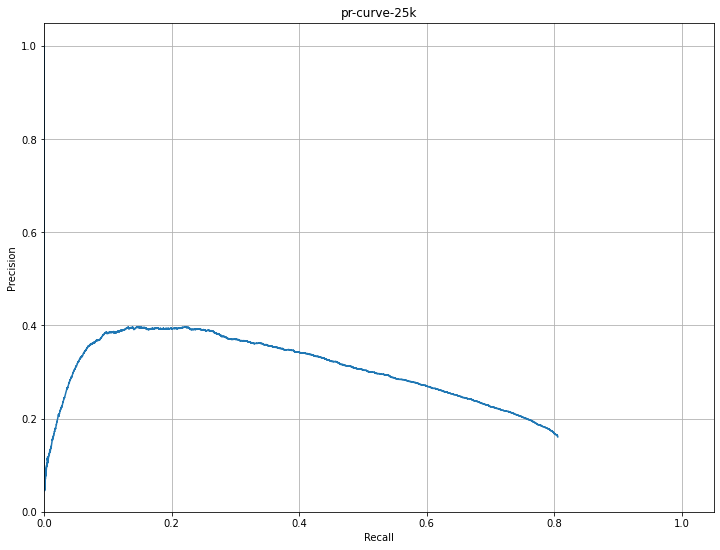

In [23]:
from getmodel import *
from settings import *
save_code()
print(get_model_name())
base_model = embedding_model_new(drop=0.3,finetune=False)
base_model.load_weights('models/weights/resnet50tf1_base_GOLD11.hdf5')
model = complete_model(base_model)
#model.compile(loss=identity_loss, optimizer=SGD(learning_rate=1e-6, momentum=0.9, nesterov=True))
model.compile(loss=identity_loss, optimizer=Adam(1e-5))
from copy import deepcopy
#save_models_weights("tf2")
#generate_full_QueryEmbeddings(base_model)
#I1 = deepcopy(I_1)
#I1 = findAccuracy(base_model)
#save_code()
Inew =[]

for i in range(5):
  print("--------------running ith {} iteration---------------------".format(i))
  if i>=1:
    Inew = combine_Is(I1, Inew)
  else:
    Inew = deepcopy(I1)
  pickle.dump(Inew, open("./data/L2Index_2_prev.p", "wb")) #epochs =300 is best
  model, base_model = test_hardOffline_online_Batch(model, base_model, epochs=int(70*(0.9**i)),batchsize = 32,pat=300)
  #model, base_model = test_hardOfflineBatch(model, base_model, epochs=200,batchsize=16)
  I1 = findAccuracy(base_model)
  save_models_weights("GOLD11")
print("out of loop")
generate_full_QueryEmbeddings(base_model)
#save_models_weights("tf2")#GOLD4
save_models_weights("GOLD11")

Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:05<00:00,  2.37it/s]


Time for generation 1.0906794746716817 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:22<00:00,  1.89it/s]


Time for generation 1.3693170468012492 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 79.53629032258065% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.03902805]
 [0.13806486]
 [0.05974472]
 [0.11813152]
 [0.07512677]]
basemodelname =  models/weights/resnet50tf1_base_GOLD10_1.hdf5
saved model weights and copied to google drive
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:39<00:00,  6.86it/s]


Time for generation 2.664846138159434 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf1.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:10<00:00,  7.11it/s]


Time for generation 1.1721384922663372 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf1.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  2873
ntp at 9=6, 49=18,99=32, 499=183, 999=359,
 4999=1266,7999=1708, 9999=1933,11999=2133
probas_pred at 9=-0.0027889013290405273, 49=-0.0068912506103515625,99=-0.010476469993591309, 499=-0.03480184078216553, 999=-0.050655364990234375,
 4999=-0.09766137599945068,7999=-0.12017333507537842, 9999=-0.13396263122558594,11999=-0.14860785007476807
precision at p[99]=0.32, p[499]=0.366,p[999]=0.359, p[4999]=0.2532,p[9999]=0.1933
recall at r[99]=0.006411540773392106, r[499]=0.03666599879783611,r[999]=0.07192947305149269, r[4999]=0.2536565818473252,r[9999]=0.3872971348427169
Average Precision: 0.14058
Recall at P90    : 0.00060
Threshold at P90 : -0.00157619
Recall at rank 1:  0.57564
Recall at rank 10: 0.57564
*******Total no

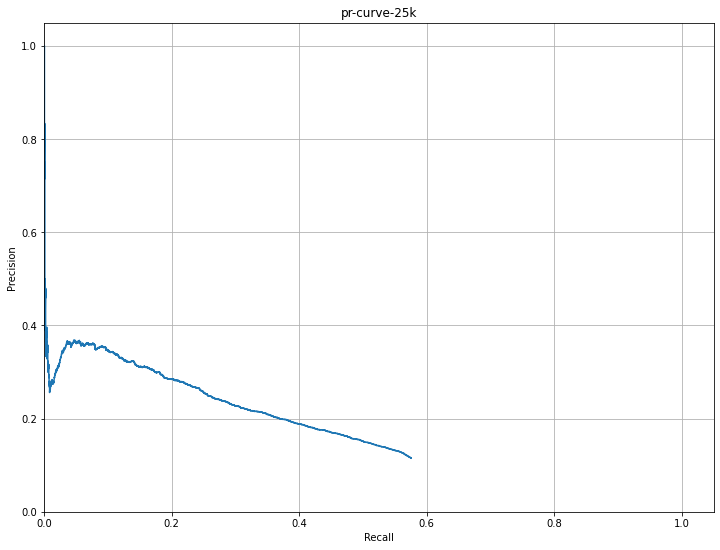

In [ ]:
I1 = findAccuracy(base_model)
save_models_weights("GOLD10_1")
generate_full_QueryEmbeddings(base_model)


--------------running ith 0 iteration---------------------
train_stop=  128
current date time:  12-10-2021_H04_M30
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
100/2500 -------------
[100] Time for 100 iterations: 3.7 mins, Train Loss: 0.10384196043014526
val_loss =  0.20764327
best loss found, previous: 1000, current: 0.2076432704925537 
curr best_val_index=  100
200/2500 -------------
[200] Time for 200 iterations: 7.4 mins, Train Loss: 0.061937347054481506
val_loss =  0.21366946
300/2500 -------------
[300] Time for 300 iterations: 11.2 mins, Train Loss: 0.1289093792438507
val_loss =  0.21726282
400/2500 -------------
[400] Time for 400 iterations: 14.9 mins, Train Loss: 0.09465546905994415
val_loss =  0.23064925
500/2500 -------------
[500] Time for 500 iterations: 18.6 mins, Train Loss: 0.13708233833312988
val

100%|██████████| 155/155 [00:59<00:00,  2.59it/s]


Time for generation 0.9957533200581868 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.07it/s]


Time for generation 1.2476991017659504 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 99.09274193548387% : 
I[0:5 [[3516]
 [   1]
 [   2]
 [3516]
 [   4]]
D[0:5 [[0.7396101 ]
 [0.1059655 ]
 [0.10689783]
 [0.76317763]
 [0.16051424]]
--------------running ith 1 iteration---------------------
train_stop=  36
current date time:  12-10-2021_H06_M04
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
100/450 -------------
[100] Time for 100 iterations: 3.6 mins, Train Loss: 0.1316552758216858
val_loss =  0.34857726
best loss found, previous: 1000, current: 0.34857726097106934 
curr best_val_index=  100
200/450 -------------
[200] Time for 200 iterations: 7.2 mins, Train Loss: 0.08009128272533417
val_loss =  0.29971462
best loss found, previ

100%|██████████| 155/155 [00:58<00:00,  2.66it/s]


Time for generation 0.9700512925783793 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:12<00:00,  2.14it/s]


Time for generation 1.2077676653862 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 99.17338709677419% : 
I[0:5 [[   0]
 [   1]
 [   2]
 [2564]
 [   4]]
D[0:5 [[1.35356   ]
 [0.11659348]
 [0.11234879]
 [1.5541846 ]
 [0.16100311]]
--------------running ith 2 iteration---------------------
train_stop=  48
current date time:  12-10-2021_H06_M23
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
100/405 -------------
[100] Time for 100 iterations: 3.6 mins, Train Loss: 0.1649213284254074
val_loss =  0.56032217
best loss found, previous: 1000, current: 0.5603221654891968 
curr best_val_index=  100
200/405 -------------
[200] Time for 200 iterations: 7.3 mins, Train Loss: 0.19708222150802612
val_loss =  0.3850956
best loss found, previous: 

100%|██████████| 155/155 [00:57<00:00,  2.67it/s]


Time for generation 0.9662793040275574 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:12<00:00,  2.13it/s]


Time for generation 1.2151058753331503 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 99.55645161290323% : 
I[0:5 [[   0]
 [   1]
 [   2]
 [4861]
 [   4]]
D[0:5 [[1.2543575 ]
 [0.1108532 ]
 [0.09326577]
 [1.5028926 ]
 [0.13456714]]
--------------running ith 3 iteration---------------------
train_stop=  50
current date time:  12-10-2021_H06_M40
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
100/364 -------------
[100] Time for 100 iterations: 3.7 mins, Train Loss: 0.19552850723266602
val_loss =  0.34400198
best loss found, previous: 1000, current: 0.34400197863578796 
curr best_val_index=  100
200/364 -------------
[200] Time for 200 iterations: 7.3 mins, Train Loss: 0.15543599426746368
val_loss =  0.36000013
300/364 -------------

100%|██████████| 155/155 [00:59<00:00,  2.63it/s]


Time for generation 0.984111734231313 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:13<00:00,  2.11it/s]


Time for generation 1.2250263571739197 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 99.4758064516129% : 
I[0:5 [[   0]
 [   1]
 [   2]
 [1865]
 [   4]]
D[0:5 [[1.2926258 ]
 [0.11226344]
 [0.09413302]
 [1.6016881 ]
 [0.14312172]]
--------------running ith 4 iteration---------------------
train_stop=  52
current date time:  12-10-2021_H06_M55
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
100/656 -------------
[100] Time for 100 iterations: 3.6 mins, Train Loss: 0.1892087608575821
val_loss =  0.41788805
best loss found, previous: 1000, current: 0.4178880453109741 
curr best_val_index=  100
200/656 -------------
[200] Time for 200 iterations: 7.3 mins, Train Loss: 0.13548606634140015
val_loss =  0.36534482
best loss found, previou

100%|██████████| 155/155 [00:58<00:00,  2.65it/s]


Time for generation 0.9748473525047302 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:13<00:00,  2.12it/s]


Time for generation 1.2186487913131714 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 99.43548387096774% : 
I[0:5 [[   0]
 [   1]
 [   2]
 [2270]
 [   4]]
D[0:5 [[0.8445449 ]
 [0.1056813 ]
 [0.09248865]
 [0.9585115 ]
 [0.14911187]]
out of loop
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:26<00:00,  7.51it/s]


Time for generation 2.4347919901212056 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:03<00:00,  7.89it/s]


Time for generation 1.056430427233378 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  4819
ntp at 9=9, 49=49,99=99, 499=499, 999=995,
 4999=4220,7999=4537, 9999=4623,11999=4680
probas_pred at 9=-0.0030421018600463867, 49=-0.010934948921203613,99=-0.017490267753601074, 499=-0.034815073013305664, 999=-0.046700239181518555,
 4999=-0.19192171096801758,7999=-0.27695584297180176, 9999=-0.31314408779144287,11999=-0.34521496295928955
precision at p[99]=0.99, p[499]=0.998,p[999]=0.995, p[4999]=0.844,p[9999]=0.4623
recall at r[99]=0.019835704267681827, r[499]=0.09997996393508315,r[999]=0.1993588459226608, r[4999]=0.8455219394910839,r[9999]=0.9262672811059908
Average Precision: 0.89650
Recall at P90    : 0.81407
Threshold at P90 : -0.165907
Recall at rank 1:  0.96554
Recall at rank 10: 0.96554
*******Total no of co

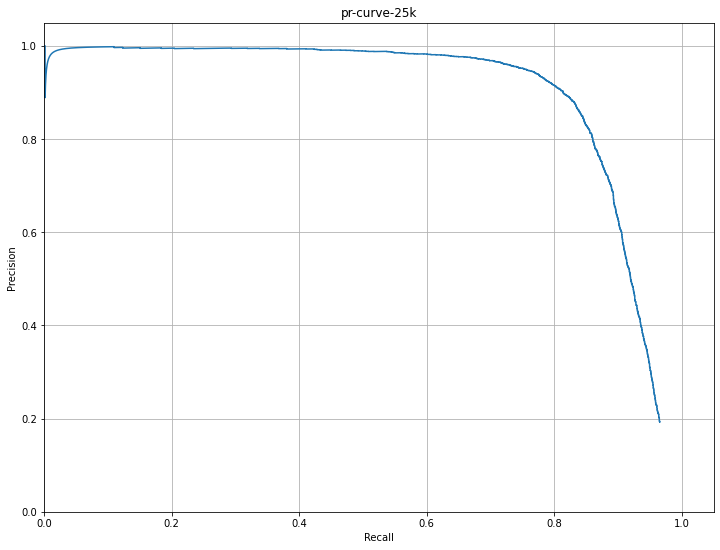

In [ ]:
#save_models_weights("GOLD6")
from tensorflow.keras.optimizers import SGD
#model.compile(loss=identity_loss, optimizer=SGD(learning_rate=1e-5, momentum=0.9, nesterov=True))
from copy import deepcopy
for i in range(5):
  print("--------------running ith {} iteration---------------------".format(i))
  if i>=1:
    Inew = combine_Is(I1, Inew)
    pickle.dump(Inew, open("./data/L2Index_2_prev.p", "wb"))
  else:
    Inew = deepcopy(I1) #epochs =300 is best
  model, base_model = test_hardOffline_online_Batch(model, base_model, epochs=int(500*(0.9**i)),batchsize = 32,pat=300)
  #model, base_model = test_hardOfflineBatch(model, base_model, epochs=200,batchsize=16)
  I1 = findAccuracy(base_model)
print("out of loop")
generate_full_QueryEmbeddings(base_model)
save_models_weights("GOLD5_drop0.5_1")

In [27]:
from triplet_hardlibtf import *
from tensorflow.keras.optimizers import SGD
from settings import *
from getmodel import *
#base_model = embedding_model_new(drop=0.3,finetune=False)
base_model.load_weights('models/weights/resnet50tf1_base_GOLD11.hdf5')
model = complete_model(base_model)
#model.compile(loss=identity_loss, optimizer=SGD(learning_rate=1e-6, momentum=0.9, nesterov=True))
model.compile(loss=identity_loss, optimizer=Adam(1e-5))
from copy import deepcopy
I1 = findAccuracy(base_model)
#I1 = deepcopy(Inew)
#save_code()
Inew =[]

for i in range(5):
  print("--------------running ith {} iteration---------------------".format(i))
  if i>=1:
    Inew = combine_Is(I1, Inew)
  else:
    Inew = deepcopy(I1)
  pickle.dump(Inew, open("./data/L2Index_2_prev.p", "wb")) #epochs =300 is best
  model, base_model = test_hardOfflineBatch(model, base_model, epochs=300,batchsize=32)
  I1 = findAccuracy(base_model)
  save_models_weights("GOLD11_offline")
print("out of loop")
generate_full_QueryEmbeddings(base_model)
save_models_weights("GOLD11_offline")

Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [00:57<00:00,  2.71it/s]


Time for generation 0.9535746773084005 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:13<00:00,  2.12it/s]


Time for generation 1.2167723496754965 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.30645161290322% : 
I[0:5 [[866]
 [  1]
 [  2]
 [  3]
 [  4]]
D[0:5 [[0.0151453 ]
 [0.04632258]
 [0.08146787]
 [0.02590108]
 [0.09202194]]
--------------running ith 0 iteration---------------------
train_stop=  67
current date time:  18-10-2021_H02_M20
Starting HardOffline training process!
-------------------------------------
100/600 -------------
[100] Time for 100 iterations: 1.9 mins, Train Loss: 0.8780679106712341
val_loss =  0.82380176
best loss found, previous: 1000, current: 0.8238017559051514 
curr best_val_index=  100
200/600 -------------
[200] Time for 200 iterations: 3.7 mins, Train Loss: 0.7718004584312439
val_loss =  0.7168868
best loss found, previous: 0.8238017559051514, current: 0.7168868184089661 
curr best_val_index=  200
300/600 -------------
[300] Time for 300 iterations: 5.6 mins, Train L

100%|██████████| 155/155 [00:57<00:00,  2.71it/s]


Time for generation 0.9540924310684205 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:12<00:00,  2.15it/s]


Time for generation 1.2014689445495605 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 93.79032258064515% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.02044547]
 [0.09162021]
 [0.06399393]
 [0.02510333]
 [0.12998903]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11_offline.hdf5
saved model weights and copied to google drive
--------------running ith 1 iteration---------------------
train_stop=  303
current date time:  18-10-2021_H02_M33
Starting HardOffline training process!
-------------------------------------
100/2700 -------------
[100] Time for 100 iterations: 1.9 mins, Train Loss: 0.8129421472549438
val_loss =  0.79759496
best loss found, previous: 1000, current: 0.7975949645042419 
curr best_val_index=  100
200/2700 -------------
[200] Time for 200 iterations: 4.0 mins, Train Loss: 0.7462135553359985
val_loss =  0.7054909
best loss found, previous: 0.7975949645042419, current: 0.70549

100%|██████████| 155/155 [00:57<00:00,  2.69it/s]


Time for generation 0.9609533826510112 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.16it/s]


Time for generation 1.1943697611490884 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 81.85483870967742% : 
I[0:5 [[   0]
 [   1]
 [   2]
 [4515]
 [   4]]
D[0:5 [[0.11131024]
 [0.02938628]
 [0.18208218]
 [0.28289902]
 [0.14489734]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11_offline.hdf5
saved model weights and copied to google drive
--------------running ith 2 iteration---------------------
train_stop=  970
current date time:  18-10-2021_H03_M29
Starting HardOffline training process!
-------------------------------------
100/9000 -------------
[100] Time for 100 iterations: 2.0 mins, Train Loss: 0.9066612720489502
val_loss =  0.6779698
best loss found, previous: 1000, current: 0.6779698133468628 
curr best_val_index=  100
200/9000 -------------
[200] Time for 200 iterations: 4.1 mins, Train Loss: 0.9882103204727173
val_loss =  0.6965833
300/9000 -------------
[300] Time for 300 iterati

100%|██████████| 155/155 [00:59<00:00,  2.59it/s]


Time for generation 0.9966310898462931 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.08it/s]


Time for generation 1.2430485685666401 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 72.88306451612904% : 
I[0:5 [[  0]
 [  1]
 [329]
 [  3]
 [  4]]
D[0:5 [[0.0219779 ]
 [0.17746735]
 [0.26993024]
 [0.04911244]
 [0.2713411 ]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11_offline.hdf5
saved model weights and copied to google drive
--------------running ith 3 iteration---------------------
train_stop=  1913
current date time:  18-10-2021_H06_M44
Starting HardOffline training process!
-------------------------------------
100/17700 -------------
[100] Time for 100 iterations: 2.1 mins, Train Loss: 0.7962916493415833
val_loss =  0.6253205
best loss found, previous: 1000, current: 0.6253204941749573 
curr best_val_index=  100
200/17700 -------------
[200] Time for 200 iterations: 4.5 mins, Train Loss: 0.9698955416679382
val_loss =  0.6432243
300/17700 -------------
[300] Time for 300 iteratio

100%|██████████| 155/155 [00:58<00:00,  2.67it/s]


Time for generation 0.9685109337170918 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:12<00:00,  2.13it/s]


Time for generation 1.2108637770016988 mins
embedding array shape: (4960, 256)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 69.97983870967742% : 
I[0:5 [[   0]
 [1506]
 [   2]
 [   3]
 [2710]]
D[0:5 [[0.01603544]
 [0.15421724]
 [0.10101187]
 [0.01330352]
 [0.1771028 ]]
basemodelname =  models/weights/resnet50tf1_base_GOLD11_offline.hdf5
saved model weights and copied to google drive
--------------running ith 4 iteration---------------------
train_stop=  2735
current date time:  18-10-2021_H13_M37
Starting HardOffline training process!
-------------------------------------
100/25500 -------------
[100] Time for 100 iterations: 2.0 mins, Train Loss: 0.45101743936538696
val_loss =  0.4395662
best loss found, previous: 1000, current: 0.4395661950111389 
curr best_val_index=  100
200/25500 -------------
[200] Time for 200 iterations: 4.5 mins, Train Loss: 0.30851370096206665
val_loss =  0.4740761
300/25500 -------------
[300] Time for 300 i

KeyboardInterrupt: ignored

  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:20<00:00,  7.82it/s]


Time for generation 2.3395726561546324 mins
*****embedding array shape: (54850, 256)
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf1.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:01<00:00,  8.14it/s]


Time for generation 1.023916741212209 mins
*****embedding array shape: (25000, 256)
Writing embedding to file./data/embed/full_query_em_resnet50tf1.hdf5
XQ embedding array shape: (25000, 256)
XD embedding array shape: (54850, 256)
*******Total no of correct predictions:  3085
ntp at 9=0, 49=0,99=0, 499=20, 999=156,
 4999=1221,7999=1745, 9999=1984,11999=2228
probas_pred at 9=-0.0, 49=-0.0,99=-0.0, 499=-0.0037103891372680664, 999=-0.01660001277923584,
 4999=-0.05836379528045654,7999=-0.07879555225372314, 9999=-0.09141826629638672,11999=-0.10487377643585205
precision at p[99]=0.0, p[499]=0.04,p[999]=0.156, p[4999]=0.2442,p[9999]=0.1984
recall at r[99]=0.0, r[499]=0.004007212983370066,r[999]=0.031256261270286516, r[4999]=0.24464035263474254,r[9999]=0.39751552795031053
Average Precision: 0.12476
Does not reach P90
Recall at rank 1:  0.61811
Recall at rank 10: 0.61811
*******Total no of correct predictions:  3085
*******Total no of incorrect predictions:  21915
*************Suggested accurac

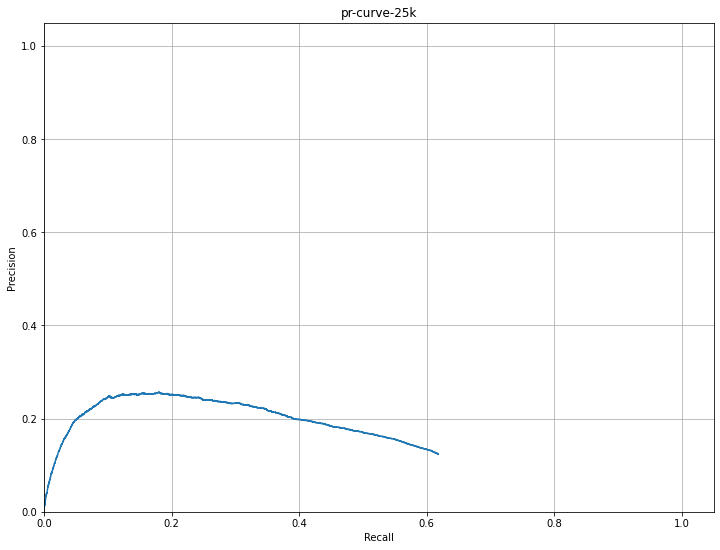

In [28]:
#I1 = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model)

[3, 25, 242, 358, 465, 497, 758, 889, 1170, 1548, 1652, 1789, 2047, 2154, 2270, 2328, 2645, 2818, 3253, 3319, 3504, 3516, 3532, 3673, 3846, 3989, 4209, 4265, 4324, 4533, 4620, 4787, 4941]
[1415, 3786, 1934, 1236, 2272, 4861, 641, 2564, 4820, 4820, 3500, 190, 641, 4820, 3846, 4820, 1934, 3811, 1934, 3435, 1233, 3981, 3500, 4820, 2100, 2178, 2645, 3435, 3435, 4494, 3049, 4210, 481]
total negs: 33


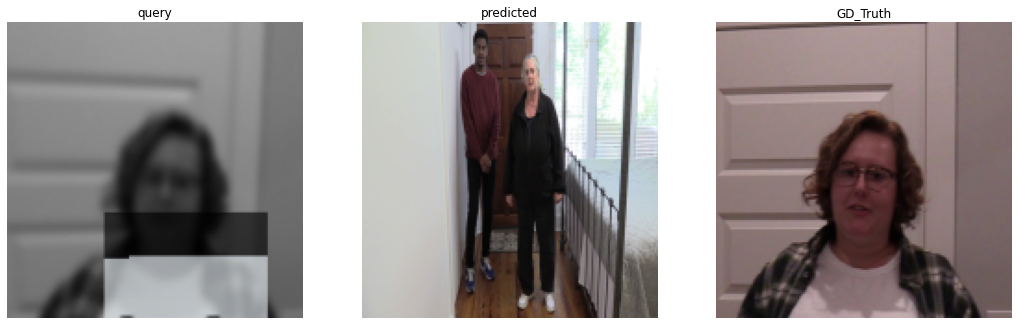

In [ ]:
queryId1, negId1 = getHardNegList(I1)
print(queryId1)
print(negId1)
print("total negs:", len(negId1))
from loader.fb_image_gen_pre_tf import *
i =32 #queryid =889,1170 is impossible
examples = [read_image(Q_List[queryId1[i]]),read_image(R_List[negId1[i]]),read_image(R_List[queryId1[i]])]
plot_triplets(examples)

triplets


<Figure size 432x288 with 0 Axes>

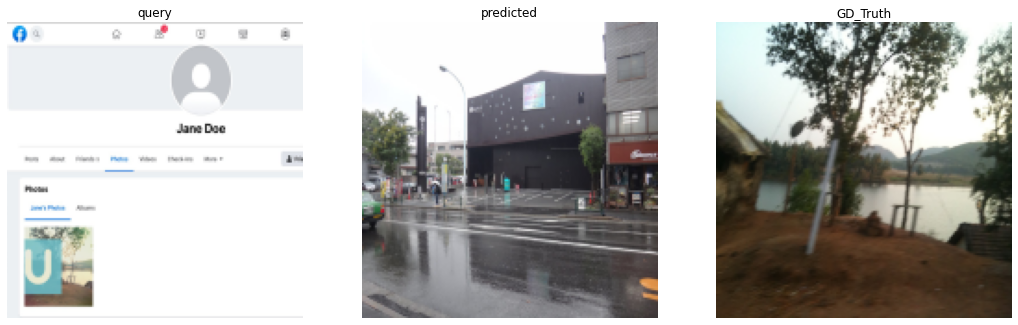

In [ ]:
i=3# good example showing too small size
plt.figure(2)
#plt.imshow(read_image(Q_List[queryId1[i]]))
print("triplets")
plot_triplets(examples)

[0, 3, 5, 25, 1236, 1514, 1652, 1940, 2100, 2154, 2270, 2328, 2818, 3253, 3319, 3460, 3516, 3673, 3846, 3981, 3989, 4292, 4374, 4494, 4533, 4620, 4820, 4941]
[2800, 4861, 164, 3786, 4317, 1170, 3500, 1783, 103, 1170, 4861, 1170, 3786, 103, 4265, 2800, 889, 1170, 103, 889, 2800, 3280, 680, 3811, 2817, 2574, 1170, 214]
total negs: 28


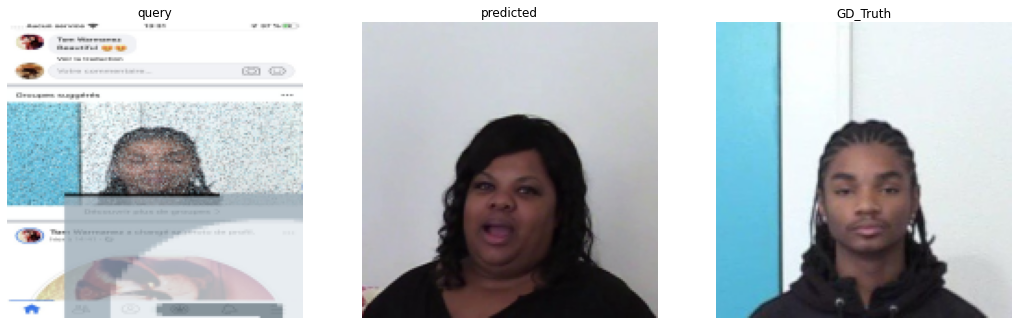

In [ ]:
#queryId1, negId1 = getHardNegList(I1)
print(queryId1)
print(negId1)
print("total negs:", len(negId1))
from loader.fb_image_gen_pre_tf import *
i =16 #queryid =889,1170,2270 is impossible
examples = [read_image(Q_List[queryId1[i]]),read_image(R_List[negId1[i]]),read_image(R_List[queryId1[i]])]
plot_triplets(examples)

In [ ]:
#save_models_weights("88R_59P")

saved model weights and copied to google drive


In [ ]:
#model.compile(loss=identity_loss, optimizer=Adam(1e-6))
model.compile(loss=identity_loss, optimizer=SGD(learning_rate=1e-5, momentum=0.9, nesterov=True))
model, base_model = test_hardbatch_traindev(model, base_model, epochs=1,batchsize=20)#ep=35(recommended)
Ihardbatch = findAccuracy(base_model)
pickle.dump(Ihardbatch, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)
#save_models_weights("_online")

current date time:  09-10-2021_H03_M13
Starting Semi-Hard Negative training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
1000/2500 -------------
[1000] Time for 1000 iterations: 29.4 mins, Train Loss: 0.087125264108181
Inside: generate_triplets_hdfseq: total seq data= 4976, neg data= 54848


KeyboardInterrupt: ignored

diff index =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

100%|██████████| 155/155 [00:57<00:00,  2.70it/s]


Time for generation 0.9569810271263123 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.18it/s]


Time for generation 1.1875553250312805 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.50806451612904% : 
I[0:5 [[2178]
 [   1]
 [   2]
 [1415]
 [   4]]
D[0:5 [[0.5859426 ]
 [0.10414565]
 [0.12292159]
 [0.4334315 ]
 [0.13501823]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:23<00:00,  7.66it/s]


Time for generation 2.3863278150558473 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:02<00:00,  8.00it/s]


Time for generation 1.0411195278167724 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4783
ntp at 9=10, 49=49,99=99, 499=497, 999=996,
 4999=4209,7999=4527, 9999=4607,11999=4649
probas_pred at 9=-0.0032280683517456055, 49=-0.012580037117004395,99=-0.017617464065551758, 499=-0.037314653396606445, 999=-0.04969632625579834,
 4999=-0.19981980323791504,7999=-0.28198862075805664, 9999=-0.3180248737335205,11999=-0.3482184410095215
precision at p[99]=0.99, p[499]=0.994,p[999]=0.996, p[4999]=0.8418,p[9999]=0.4607
recall at r[99]=0.019835704267681827, r[499]=0.09957924263674614,r[999]=0.1995592065718293, r[4999]=0.8433179723502304,r[9999]=0.9230615107192948
Average Precision: 0.89173
Recall at P90    : 0.81146
Threshold at P90 : -0.17534
Recall at rank 1:  0.95832
Recall at rank 10: 0.95832
*******Total no of correct predictions:  4783
*******Total no of incorrect predictions:  20217
*************Suggested accuracy from metrics 

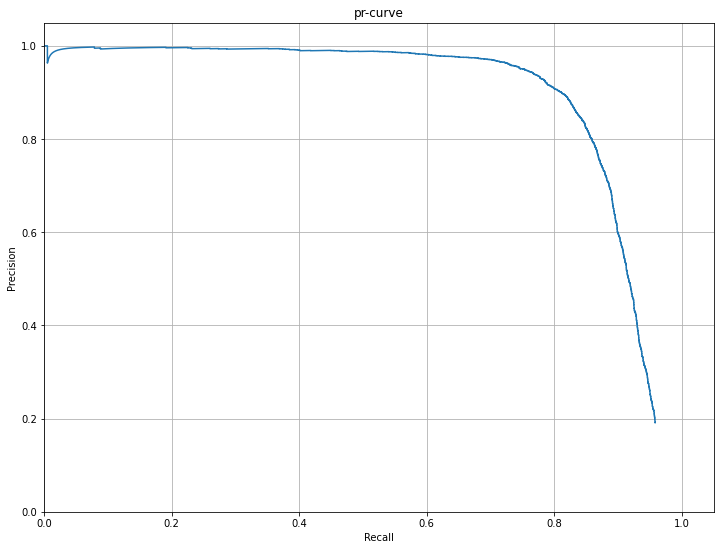

In [ ]:
Inew = combine_Is(Ioffline, Ihardbatch)
pickle.dump(Inew, open("./data/L2Index_2_prev.p", "wb"))
model.compile(loss=identity_loss, optimizer=Adam(1e-6))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=500,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model=base_model)
save_models_weights("_offline1")

  found 4991 images
  found 4991 images
train_stop=  194
current date time:  30-09-2021_H20_M52
Starting HardOffline training process!
-------------------------------------
100/3000 -------------
[100] Time for 100 iterations: 3.2 mins, Train Loss: 0.10700976103544235
val_loss =  0.22466552
best loss found, previous: 1000, current: 0.22466552257537842 
curr best_val_index=  100
200/3000 -------------
[200] Time for 200 iterations: 6.5 mins, Train Loss: 0.1465877741575241
val_loss =  0.21161029
best loss found, previous: 0.22466552257537842, current: 0.21161028742790222 
curr best_val_index=  200
300/3000 -------------
[300] Time for 300 iterations: 9.7 mins, Train Loss: 0.14074960350990295
val_loss =  0.16091666
best loss found, previous: 0.21161028742790222, current: 0.16091665625572205 
curr best_val_index=  300
400/3000 -------------
[400] Time for 400 iterations: 12.9 mins, Train Loss: 0.11773823201656342
val_loss =  0.14855811
best loss found, previous: 0.16091665625572205, curren

100%|██████████| 155/155 [00:56<00:00,  2.72it/s]


Time for generation 0.9483186920483907 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.17it/s]


Time for generation 1.193259867032369 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 97.76209677419355% : 
I[0:5 [[2047]
 [   1]
 [   2]
 [2270]
 [   4]]
D[0:5 [[0.41898155]
 [0.10258305]
 [0.1300534 ]
 [0.34765708]
 [0.14965999]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:21<00:00,  7.77it/s]


Time for generation 2.3537535389264423 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [02:07<00:00,  7.82it/s]


Time for generation 2.1311434229214985 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4749
ntp at 9=10, 49=49,99=99, 499=497, 999=995,
 4999=4170,7999=4491, 9999=4566,11999=4619
probas_pred at 9=-0.003312230110168457, 49=-0.01287841796875,99=-0.0180056095123291, 499=-0.038443684577941895, 999=-0.051164984703063965,
 4999=-0.19736766815185547,7999=-0.27593719959259033, 9999=-0.3100402355194092,11999=-0.33981502056121826
precision at p[99]=0.99, p[499]=0.994,p[999]=0.995, p[4999]=0.834,p[9999]=0.4566
recall at r[99]=0.019835704267681827, r[499]=0.09957924263674614,r[999]=0.1993588459226608, r[4999]=0.8355039070326588,r[9999]=0.9148467241033861
Average Precision: 0.88171
Recall at P90    : 0.79463
Threshold at P90 : -0.171979
Recall at rank 1:  0.95151
Recall at rank 10: 0.95151
*******Total no of correct predictions:  4749
*******Total no of incorrect predictions:  20251
*************Suggested accuracy from metrics evalu

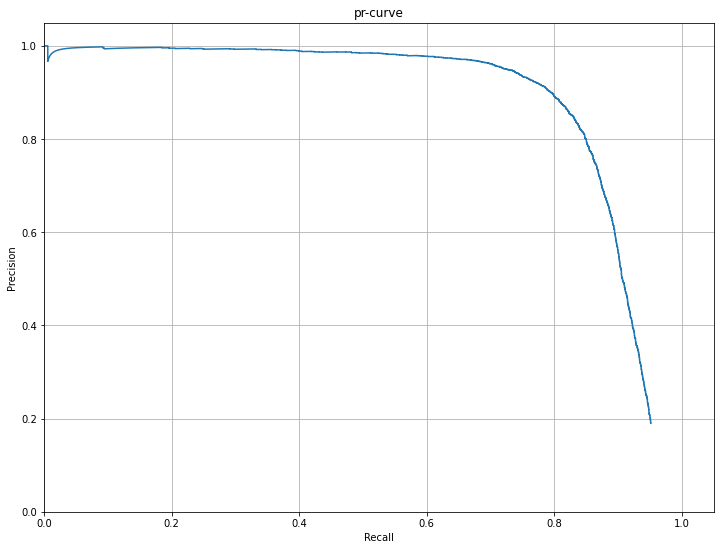

In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(1e-6))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=1000,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model=base_model)
save_models_weights("_offline1")

In [ ]:
#pickle.load(open("./L2Index_2_prev.p", "rb"))
#save it in filename that is read as hardocded by offline
#pickle.dump(Ioffline, open("L2Index_2_prev", "wb"))

In [ ]:
from settings import *
#from loader.fb_image_gen_pre_tf import *
#base_model = embedding_model()
#base_model.save_weights('models/weights/temp.hdf5')
model.compile(loss=identity_loss, optimizer=Adam(1e-5))
#base_model.save_weights('models/weights/temp.hdf5')
#base_model.load_weights('models/weights/temp.hdf5')
model, base_model = test_hardbatch(model, base_model, epochs=20,batchsize=20)#ep=35(recommended)
Ihardbatch = findAccuracy(base_model)
pickle.dump(Ihardbatch, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)
#save_models_weights("_online")


In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(5e-6))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=50,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model=base_model)
save_models_weights("_offline")

  found 4991 images
  found 4991 images
train_stop=  102
Starting HardOffline training process!
-------------------------------------
100/5000 -------------
[100] Time for 100 iterations: 1.4 mins, Train Loss: 0.8139911890029907
val_loss =  0.8438009
best loss found, previous: 1000, current: 0.8438009023666382 
curr best_val_index=  100
200/5000 -------------
[200] Time for 200 iterations: 2.8 mins, Train Loss: 1.027233362197876
val_loss =  0.8462084
best val loss=0.8438009023666382, at iter=100
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:07<00:00,  2.30it/s]


Time for generation 1.1239829063415527 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:21<00:00,  1.89it/s]


Time for generation 1.364534040292104 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.02419354838709% : 
I[0:5 [[1547]
 [   1]
 [   2]
 [3516]
 [   4]]
D[0:5 [[0.18766236]
 [0.0865047 ]
 [0.03128994]
 [0.0491488 ]
 [0.0714767 ]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [03:27<00:00,  5.29it/s]


Time for generation 3.4536869645118715 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [03:32<00:00,  4.70it/s]


Time for generation 3.5489093979199726 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4751
ntp at 9=10, 49=49,99=97, 499=484, 999=975,4999=4634,9999=4634
probas_pred at 9=-0.0032805204391479492, 49=-0.01036679744720459,99=-0.014831900596618652, 499=-0.0286252498626709, 999=-0.03740894794464111,4999=-0.32013440132141113,9999=-0.32013440132141113
precision at p[99]=0.97, p[499]=0.968,p[999]=0.975, p[4999]=0.8644,p[9999]=0.4634
recall at r[99]=0.01943498296934482, r[499]=0.0969745541975556,r[999]=0.19535163293929073, r[4999]=0.8659587257062713,r[9999]=0.9284712482468443
Average Precision: 0.89102
Recall at P90    : 0.85273
Threshold at P90 : -0.151055
Recall at rank 1:  0.95191
Recall at rank 10: 0.95191
*******Total no of correct predictions:  4751
*******Total no of incorrect predictions:  20249
*************Suggested accuracy from metrics evaluation************
Accuracy Score: 0.89168
Balanced Accuracy Score: 0.9154923

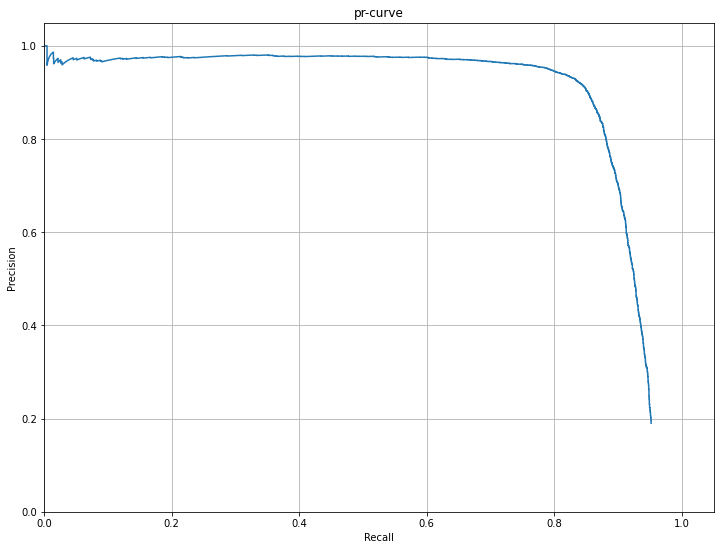

In [ ]:
from settings import *
model.compile(loss=identity_loss, optimizer=Adam(4e-7))
#pickle.dump(Ioffline, open("./data/L2Index_2_prev.p", "wb"))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=1000,batchsize=20)
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model)
save_models_weights("_final")

In [ ]:
save_models_weights()

saved model weights and copied to google drive


In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(1e-6))
model, base_model = test_hardbatch(model, base_model, epochs=30,batchsize=32)
Ihardbatch = findAccuracy(base_model)

model weights filepath name is:  ./models/weights/model_resnet50tf_EP30_18-09-2021_H19_M03.hdf5
Starting Semi-Hard Negative training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 4976, neg data= 54800
no semi hard found, going for the maximum loss: 
no semi hard found, going for the maximum loss: 
100/3720 -------------
[100] Time for 100 iterations: 3.3 mins, Train Loss: 0.010540260002017021
Inside: generate_triplets_hdfseq: total seq data= 4976, neg data= 54848
val_loss =  0.010104858027320475
best loss found, previous: 1000, current: 0.010104858027320475 
curr best_val_index=  100
no semi hard found, going for the maximum loss: 
200/3720 -------------
[200] Time for 200 iterations: 6.5 mins, Train Loss: 0.028383055701851845
val_loss =  0.01091107215935124
no semi hard found, going for the maximum loss: 
300/3720 -------------
[300] Time for 300 iterations: 9.5 mins, Train Loss: 0.028481725603342056
val_loss =  0.010554860472761756
n

100%|██████████| 155/155 [01:07<00:00,  2.29it/s]


Time for generation 1.1278113802274068 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:25<00:00,  1.81it/s]


Time for generation 1.4239691495895386 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 91.53225806451613% : 
I[0:10 [[4265]
 [   1]
 [   2]
 [4601]
 [   4]
 [3846]
 [   6]
 [   7]
 [   8]
 [   9]]
D[0:10 [[0.04407942]
 [0.39232326]
 [0.28685176]
 [0.01804185]
 [0.32137644]
 [0.01851201]
 [0.2870798 ]
 [0.25143027]
 [0.3023138 ]
 [0.16035903]]


train_stop=  313
Starting HardOffline training process!
-------------------------------------
100/800 -------------
[100] Time for 100 iterations: 4.1 mins, Train Loss: 0.7796737551689148
val_loss =  0.9788098
best loss found, previous: 1000, current: 0.9788097739219666 
curr best_val_index=  100
200/800 -------------
[200] Time for 200 iterations: 8.2 mins, Train Loss: 0.6883440613746643
val_loss =  0.8793571
best loss found, previous: 0.9788097739219666, current: 0.879357099533081 
curr best_val_index=  200
300/800 -------------
[300] Time for 300 iterations: 12.2 mins, Train Loss: 0.6741547584533691
val_loss =  0.757611
best loss found, previous: 0.879357099533081, current: 0.7576109766960144 
curr best_val_index=  300
400/800 -------------
[400] Time for 400 iterations: 16.3 mins, Train Loss: 0.5261223316192627
val_loss =  0.5904502
best loss found, previous: 0.7576109766960144, current: 0.5904502272605896 
curr best_val_index=  400
500/800 -------------
[500] Time for 500 iteratio

100%|██████████| 155/155 [01:08<00:00,  2.27it/s]


Time for generation 1.1370920419692994 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:23<00:00,  1.86it/s]


Time for generation 1.3909178098042807 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 97.19758064516128% : 
I[0:10 [[4265]
 [   1]
 [   2]
 [1415]
 [   4]
 [2270]
 [   6]
 [   7]
 [   8]
 [   9]]
D[0:10 [[0.32987583]
 [0.10146284]
 [0.06559181]
 [0.1302607 ]
 [0.13031459]
 [0.05911767]
 [0.17147458]
 [0.10587513]
 [0.09113872]
 [0.05688286]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [03:35<00:00,  5.09it/s]


Time for generation 3.588854134082794 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [03:11<00:00,  5.22it/s]


Time for generation 3.1958722631136576 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4701
ntp at 9=9, 49=49,99=99, 499=490, 999=975,4999=4580,9999=4580
probas_pred at 9=-0.0034099817276000977, 49=-0.010561108589172363,99=-0.016254186630249023, 499=-0.03421342372894287, 999=-0.04616427421569824,4999=-0.33088529109954834,9999=-0.33088529109954834
precision at p[99]=0.99, p[499]=0.98,p[999]=0.975, p[4999]=0.8362,p[9999]=0.458
recall at r[99]=0.019835704267681827, r[499]=0.09817671809256662,r[999]=0.19535163293929073, r[4999]=0.8377078741735123,r[9999]=0.9176517731917452
Average Precision: 0.86359
Recall at P90    : 0.78481
Threshold at P90 : -0.14367
Recall at rank 1:  0.94190
Recall at rank 10: 0.94190
*******Total no of correct predictions:  4701
*******Total no of incorrect predictions:  20299
*************Suggested accuracy from metrics evaluation************
Accuracy Score: 0.87468
Balanced Accuracy Score: 0.9046032

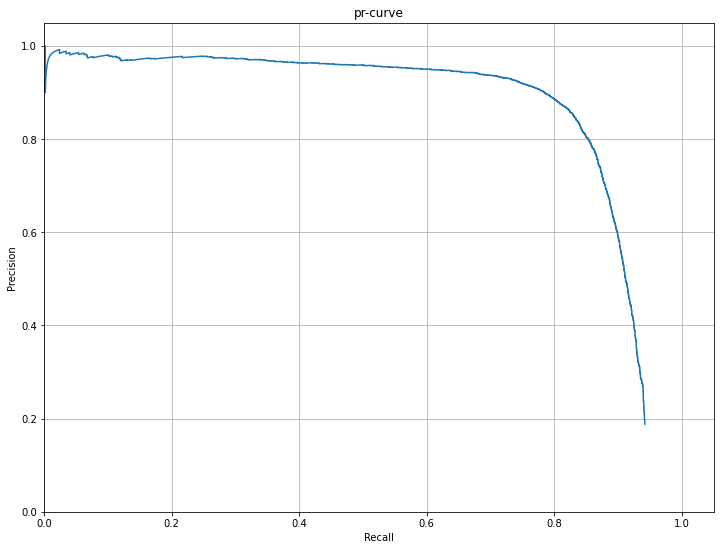

In [ ]:
#baseline to compare
#model.compile(loss=identity_loss, optimizer=Adam(1e-5))
#model, base_model = test_hardOfflineBatch(model, base_model, epochs=200,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
#Ioffline = findAccuracy(base_model)
#generate_full_QueryEmbeddings(base_model=base_model)

In [ ]:

model.save_weights(modelFilePath +get_model_name()+ "complete.hdf5")
base_model.save_weights(modelFilePath + get_model_name()+"base.hdf5")
!cp ./models/weights/*.hdf5 /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf

In [ ]:
#!cp /content/models/*.py /content/drive/MyDrive/collab_drive/isc2021/models/
#!cp /content/loader/*.py /content/drive/MyDrive/collab_drive/isc2021/loader/
#!cp /content/*.ipynb /content/drive/MyDrive/collab_drive/isc2021/